In [86]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
stop_words = {'needn', 'there', 'at', 'just', 'below', 'both', 'as', 'have', 'aren', "won't", 'shouldn', 'about', 'who', 'hers', 'or', 'ma', 'their', 'very', 'until', 'after', 're', "wasn't", "you'd", 'to', 'am', 'during', 'wouldn', 'same', 'down', 'not', 'mustn', 'too', "you've", 'are', 'I', 'an', "wouldn't", 'weren', 'we', 'those', 'than', 'most', "don't", 'what', 'this', "you'll", "shouldn't", 'wasn', "mightn't", 'she', 'ain', 'himself', 'm', 'shan', "aren't", 'no', 'by', 'any', "you're", 'he', 'o', 'ourselves', 'her', 'under', "didn't", 'from', 'over', "haven't", 'myself', 'did', 'above', 'herself', 'but', 'how', 'will', 'own', 'such', 'into', "doesn't", "couldn't", "needn't", 'themselves', 'yours', 'won', 'between', 'yourself', 'which', 'my', 'you', 'was', 'in', 'out', 'again', 'while', 'nor', 'of', 'isn', 'your', 'once', 'the', "that'll", 'hadn', 'has', 'it', 'itself', 'do', 'can', "hasn't", 'so', 'because', 'through', 'haven', 'each', 'off', 'further', 'theirs', 'does', 'me', 'had', 'should', 'being', "should've", 'that', 'him', "shan't", 'is', 'were', 'd', 'doesn', 'mightn', "it's", 'whom', 'them', 'against', 'our', 'having', "weren't", 'doing', "mustn't", 'its', 'now', 'all', 'when', 'where', 'why', 'up', 'other', 'some', 'been', 'if', 's', "hadn't", 'before', 'with', 'then', 'his', 'they', 'few', 'these', 'for', 'be', 'didn', 'ours', 'here', 'and', 'on', 'yourselves', "she's", 'y', 't', 'more', 'hasn', 'only', 'a', 've', 'll', "isn't", 'don', 'couldn'}
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV


In [ ]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df = pd.read_csv("Tweets.csv")

In [ ]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [ ]:
df.columns

Index(['textID', 'text', 'selected_text', 'sentiment'], dtype='object')

In [ ]:
text_df = df.drop(['textID',  'selected_text', 'sentiment'], axis ="columns")

In [ ]:
text_df.columns

Index(['text'], dtype='object')

In [ ]:
text_df.head()

,text
0,"I`d have responded, if I were going"
1,Sooo SAD I will miss you here in San Diego!!!
2,my boss is bullying me...
3,what interview! leave me alone
4,"Sons of ****, why couldn`t they put them on t..."


In [ ]:
for i in range (4):
    print(text_df["text"].iloc[i],"\n") #this is the raw data

 I`d have responded, if I were going 

 Sooo SAD I will miss you here in San Diego!!! 

my boss is bullying me... 

 what interview! leave me alone 



In [ ]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    27480 non-null  object
dtypes: object(1)
memory usage: 214.8+ KB


In [ ]:
print(text_df)

                                                    text
0                    I`d have responded, if I were going
1          Sooo SAD I will miss you here in San Diego!!!
2                              my boss is bullying me...
3                         what interview! leave me alone
4       Sons of ****, why couldn`t they put them on t...
...                                                  ...
27476   wish we could come see u on Denver  husband l...
27477   I`ve wondered about rake to.  The client has ...
27478   Yay good for both of you. Enjoy the break - y...
27479                         But it was worth it  ****.
27480     All this flirting going on - The ATG smiles...

[27481 rows x 1 columns]


In [ ]:
text_df.text=text_df.text.astype(str)

In [ ]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub(r"\*","",text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [ ]:
text_df.text = text_df['text'].apply(lambda x: data_processing(x))

In [ ]:
text_df.head()

,text
0,id responded i going
1,sooo sad i miss san diego
2,boss bullying
3,interview leave alone
4,sons couldnt put releases already bought


In [ ]:
text_df = text_df.drop_duplicates("text")

In [ ]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26962 entries, 0 to 27480
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    26962 non-null  object
dtypes: object(1)
memory usage: 421.3+ KB


In [ ]:
for w in text_df:
    print(type(w))

<class 'str'>


In [ ]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    text = ''.join(text)
    return text

In [ ]:
text_df.head()

,text
0,id responded i going
1,sooo sad i miss san diego
2,boss bullying
3,interview leave alone
4,sons couldnt put releases already bought


In [ ]:
for w in text_df["text"]:
    if type(w) is float:
        w = str(w)
        print(w)

In [ ]:
text_df.head()

,text
0,id responded i going
1,sooo sad i miss san diego
2,boss bullying
3,interview leave alone
4,sons couldnt put releases already bought


In [ ]:
text_df.fillna('', inplace=True)

In [ ]:
text_df.head()

,text
0,id responded i going
1,sooo sad i miss san diego
2,boss bullying
3,interview leave alone
4,sons couldnt put releases already bought


In [ ]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x))

In [ ]:
text_df.head()

,text
0,id responded i going
1,sooo sad i miss san diego
2,boss bullying
3,interview leave alone
4,sons couldnt put releases already bought


In [ ]:
text = text_df.text
print(text)

0                                     id responded i going
1                                sooo sad i miss san diego
2                                            boss bullying
3                                    interview leave alone
4                 sons couldnt put releases already bought
                               ...                        
27476    wish could come see u denver husband lost job ...
27477    ive wondered rake client made clear net dont f...
27478    yay good enjoy break probably need hectic week...
27479                                                worth
27480                   flirting going atg smiles yay hugs
Name: text, Length: 26962, dtype: object


In [ ]:
import functools
def convert(s):
 
    # Using reduce to jion the list s to string
    str1 = functools.reduce(lambda x,y : x+y, s)
 
    # Return string 1
    return str1

In [ ]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

id responded i going 

sooo sad i miss san diego 

boss bullying 

interview leave alone 

sons couldnt put releases already bought 



In [ ]:
print(text_df['text'].iloc[0],"\n")

id responded i going 



In [ ]:
def polarity(text):
    #using textblob for checking the polarity of the data
    return TextBlob(text).sentiment.polarity

In [ ]:
text_df["polarity"] = text_df["text"].apply(lambda x: polarity(x))

In [ ]:
text_df.head(500)

,text,polarity
0,id responded i going,0.0
1,sooo sad i miss san diego,-0.5
2,boss bullying,0.0
3,interview leave alone,0.0
4,sons couldnt put releases already bought,0.0
...,...,...
496,uploading bamboozle pictures facebook,0.0
497,congratulations guys finish month early booo,0.1
498,actually i wish i back tahoe i miss,0.0
499,woke upi wan na stay bed,-0.2


In [ ]:
def sentiment(label):
    if label>0:
        return "Positive"
    elif label == 0:
        return "Neutral"
    else:
        return "Negative"

In [ ]:
Positive = "Positive"
Negative = "Negative"
Neutral = "Neutral"

In [ ]:
text_df["sentiment"] = text_df["polarity"].apply(sentiment)

In [ ]:
text_df.head()

,text,polarity,sentiment
0,id responded i going,0.0,Neutral
1,sooo sad i miss san diego,-0.5,Negative
2,boss bullying,0.0,Neutral
3,interview leave alone,0.0,Neutral
4,sons couldnt put releases already bought,0.0,Neutral


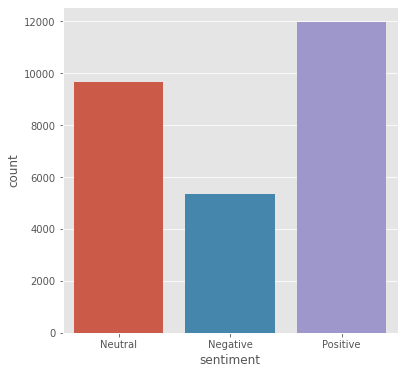

In [ ]:
fig = plt.figure(figsize = (6,6))
sns.countplot(x = "sentiment", data = text_df)

In [ ]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26962 entries, 0 to 27480
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   text       26962 non-null  object 
 1   polarity   26962 non-null  float64
 2   sentiment  26962 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.8+ MB


Text(0.5, 1.0, 'Distribhution of Sentiments')

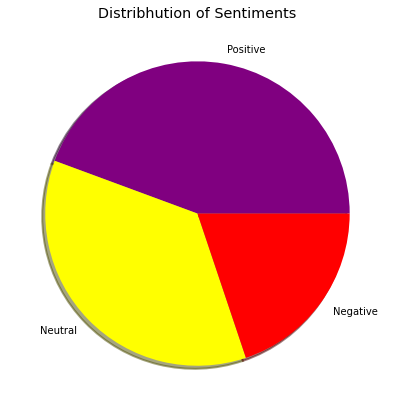

In [ ]:
fig = plt.figure(figsize = (7,7))
colors = ["purple","yellow","red"]
wp = {
    "linewidth" : 2,
    
}
tags = text_df["sentiment"].value_counts()
tags.plot(kind="pie",shadow = True, colors = colors,wedgeprops = wp,label="")
plt.title("Distribhution of Sentiments")

In [ ]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df["text"])

In [74]:
pos_tweets = text_df[text_df.sentiment == Positive]
pos_tweets = pos_tweets.sort_values(["polarity"],ascending=False)
pos_tweets.head()

,text,polarity,sentiment
5,httpwwwdothebouncycomsmf shameless plugging be...,1.0,Positive
17114,mom hed sigh shes wonderful slip youd think co...,1.0,Positive
7969,i thing parents best friend,1.0,Positive
17302,perfect song,1.0,Positive
17288,going grocery store best friend,1.0,Positive


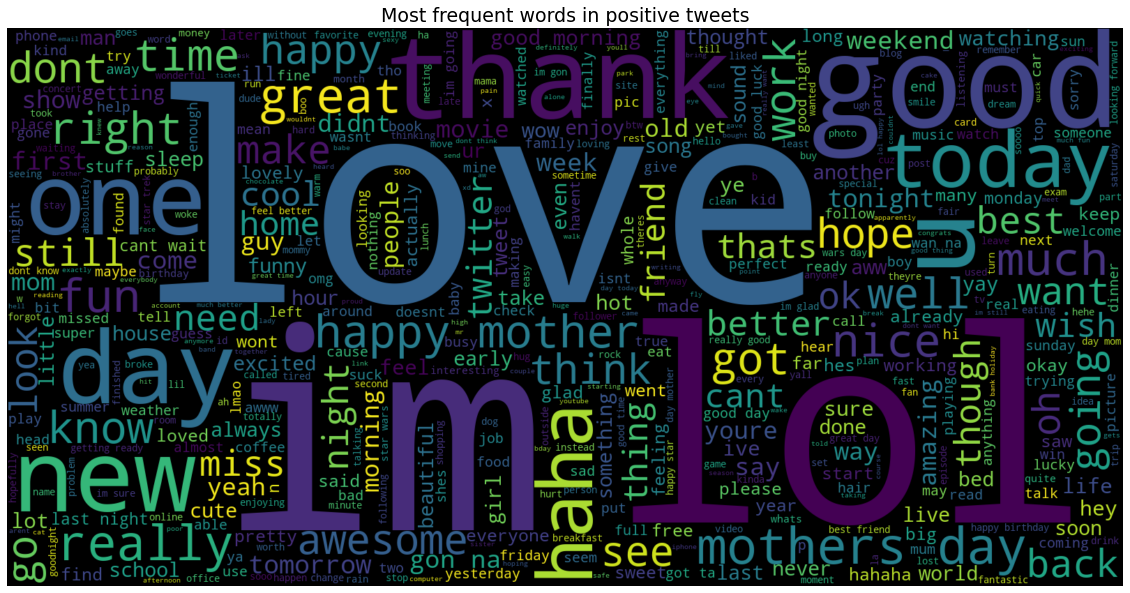

In [75]:
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [ ]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))


In [ ]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)

In [78]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [77]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (21569, 163053)
Size of y_train: (21569,)
Size of x_test: (5393, 163053)
Size of y_test: (5393,)


In [76]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {}%".format(logreg_acc))

Test accuracy: 0.9067309475245688%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [84]:
print(confusion_matrix(y_test,logreg_pred))
print("\n")
print(classification_report(y_test,logreg_pred))

[[ 846  169   99]
 [  16 1879   25]
 [  47  147 2165]]


              precision    recall  f1-score   support

    Negative       0.93      0.76      0.84      1114
     Neutral       0.86      0.98      0.91      1920
    Positive       0.95      0.92      0.93      2359

    accuracy                           0.91      5393
   macro avg       0.91      0.89      0.89      5393
weighted avg       0.91      0.91      0.91      5393



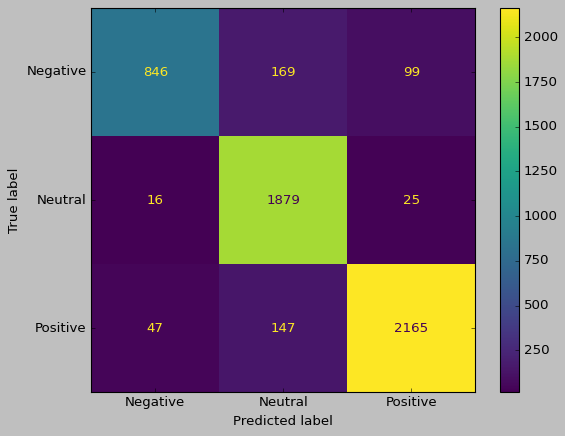

In [85]:
style.use("classic")
cm = confusion_matrix(y_test,logreg_pred,labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logreg.classes_)
disp.plot()

In [92]:
#grid search

parameters = {
    "C" : [0.001, 0.01, 0.1, 1, 10]
  
}

grid = GridSearchCV(LogisticRegression(),parameters)
grid.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [93]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 10}


In [96]:
logreg_acc = accuracy_score(logreg_predict, y_test)
print("Test accuracy: {}%".format(logreg_acc))

Test accuracy: 0.9067309475245688%


In [98]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 846  169   99]
 [  16 1879   25]
 [  47  147 2165]]


              precision    recall  f1-score   support

    Negative       0.93      0.76      0.84      1114
     Neutral       0.86      0.98      0.91      1920
    Positive       0.95      0.92      0.93      2359

    accuracy                           0.91      5393
   macro avg       0.91      0.89      0.89      5393
weighted avg       0.91      0.91      0.91      5393

